# Comparison of SVM & MLP for Numerai stock prediction

### INM427 Neural Computing | RAJANI MOHAN JANIPALLI | City Univeristy of London

##### About data set

Data set source: https://www.kaggle.com/datasets/numerai/encrypted-stock-market-data-from-numerai 

The data set is high quality financial market data of global equities collected by Numerai that has been cleaned and regularized and **obfuscated** to secure the value of the data set while simultaneously retaining its unique features for the purpose of building predictive models with machine learning. Numerai gives away data so that users around the world have free, hedge-fund quality data to build their machine learning models, using which a quant hedge fund is built. Each Instance corresponds to a stock at a particular time period. The features describe the various quantitive attributes of the stock at the time. The aim is to build a model to predict the future target using the features that correpond to the current market.

Reference:

https://docs.numer.ai/tournament/learn

https://numerai.fund/ (see **Answers** at the bottom of the page).

Import intiallly required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Coding Reference for all pandas related commands:

https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html#user-guide

Load the data into a pandas data frame.

In [2]:
numerai_df = pd.read_csv("numerai_training_data.csv")

See the number of rows and columns of the data frame.

In [3]:
numerai_df.shape

(96320, 22)

Have a glance of first five rows of the data frame.

In [4]:
numerai_df.head(5)

feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0  0.137662  0.445825  0.471079  0.279196  0.275892  0.861967  0.305975   
1  0.651766  0.242053  0.720764  0.784000  0.685828  0.345841  0.038447   
2  0.810204  0.677403  0.538941  0.442458  0.662420  0.208793  0.592084   
3  0.672010  0.534088  0.336534  0.813820  0.331032  0.278800  0.443542   
4  0.763534  0.070120  0.353167  0.440987  0.426678  0.887997  0.747788   

   feature8  feature9  feature10  ...  feature13  feature14  feature15  \
0  0.222414  0.893704   0.475781  ...   0.024044   0.703299   0.128572   
1  0.326108  0.760536   0.741738  ...   0.544590   0.449178   0.547613   
2  0.439066  0.442903   0.404538  ...   0.796002   0.361473   0.395270   
3  0.728365  0.573129   0.603860  ...   0.190886   0.553522   0.403684   
4  0.975318  0.338439   0.406945  ...   0.440494   0.141096   0.613245   

   feature16  feature17  feature18  feature19  feature20  feature21  target  
0   0.083492   0.639390   0.299443   0.055273   0.000308   0.784610       1  
1   0.863165   0.832559   0.682060   0.009634   0.829331   0.969233       1  
2   0.390462   0.086536   0.578854   0.603345   0.265151   0.052699       1  
3   0.827155   0.102396   0.323720   0.656344   0.704652   0.152971       0  
4   0.508625   0.315753   0.397510   0.111777   0.473443   0.259582       0  

[5 rows x 22 columns]

Data frame Information - Check the names, data type and the number of non-missing values for all the columns in the data frame.

In [5]:
numerai_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96320 entries, 0 to 96319
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   96320 non-null  float64
 1   feature2   96320 non-null  float64
 2   feature3   96320 non-null  float64
 3   feature4   96320 non-null  float64
 4   feature5   96320 non-null  float64
 5   feature6   96320 non-null  float64
 6   feature7   96320 non-null  float64
 7   feature8   96320 non-null  float64
 8   feature9   96320 non-null  float64
 9   feature10  96320 non-null  float64
 10  feature11  96320 non-null  float64
 11  feature12  96320 non-null  float64
 12  feature13  96320 non-null  float64
 13  feature14  96320 non-null  float64
 14  feature15  96320 non-null  float64
 15  feature16  96320 non-null  float64
 16  feature17  96320 non-null  float64
 17  feature18  96320 non-null  float64
 18  feature19  96320 non-null  float64
 19  feature20  96320 non-null  float64
 20  featur

Applying seaborn plot style to all the plots further.

In [6]:
plt.style = sns

#### Exploratory data analysis

As mentioned in the **"About data"** section above, the data is cleaned and regularized. But, its still a good procedure to check for any scope of cleaning and regularization of data through exploratory data analysis.

Plot boxplots of all the columns of the data frame to check outliers and quartiles.

<AxesSubplot:>

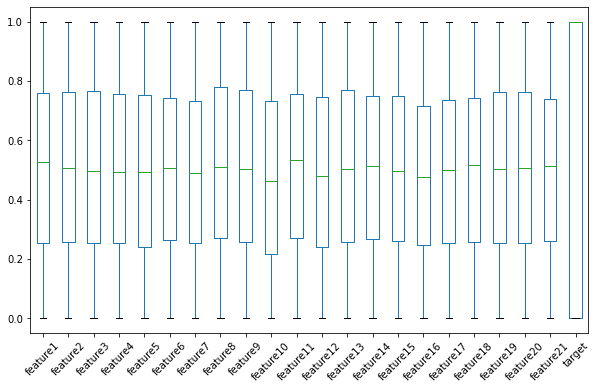

In [7]:
numerai_df.boxplot(grid=False, rot=45, figsize=(10,6))

Plotting all the features in sets of five, to check their distribution.

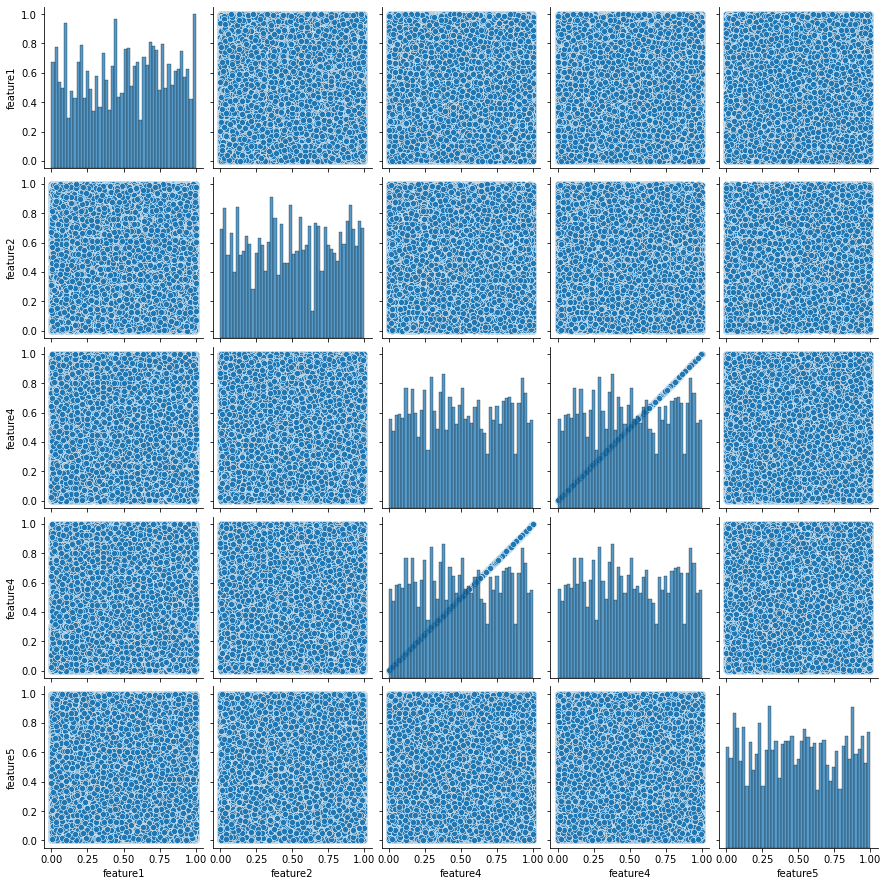

In [8]:
sns.pairplot(
    numerai_df,
    x_vars=["feature1", "feature2", "feature4", "feature4", "feature5"],
    y_vars=["feature1", "feature2", "feature4", "feature4", "feature5"],
)

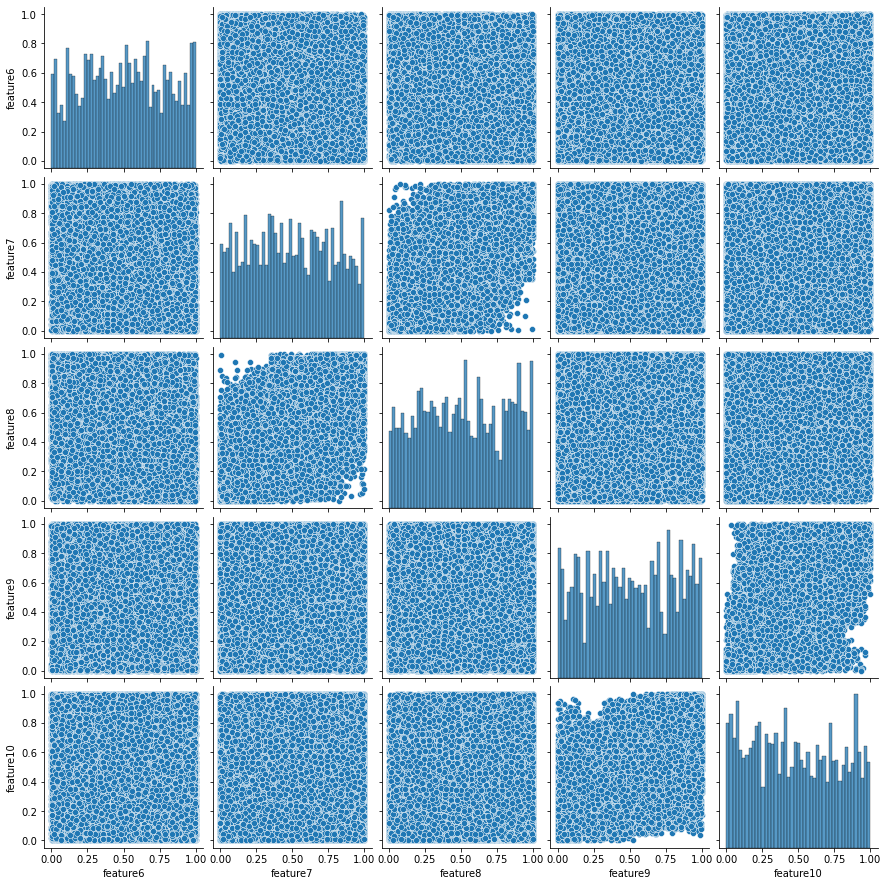

In [9]:
sns.pairplot(
    numerai_df,
    x_vars=["feature6", "feature7", "feature8", "feature9", "feature10"],
    y_vars=["feature6", "feature7", "feature8", "feature9", "feature10"],
)

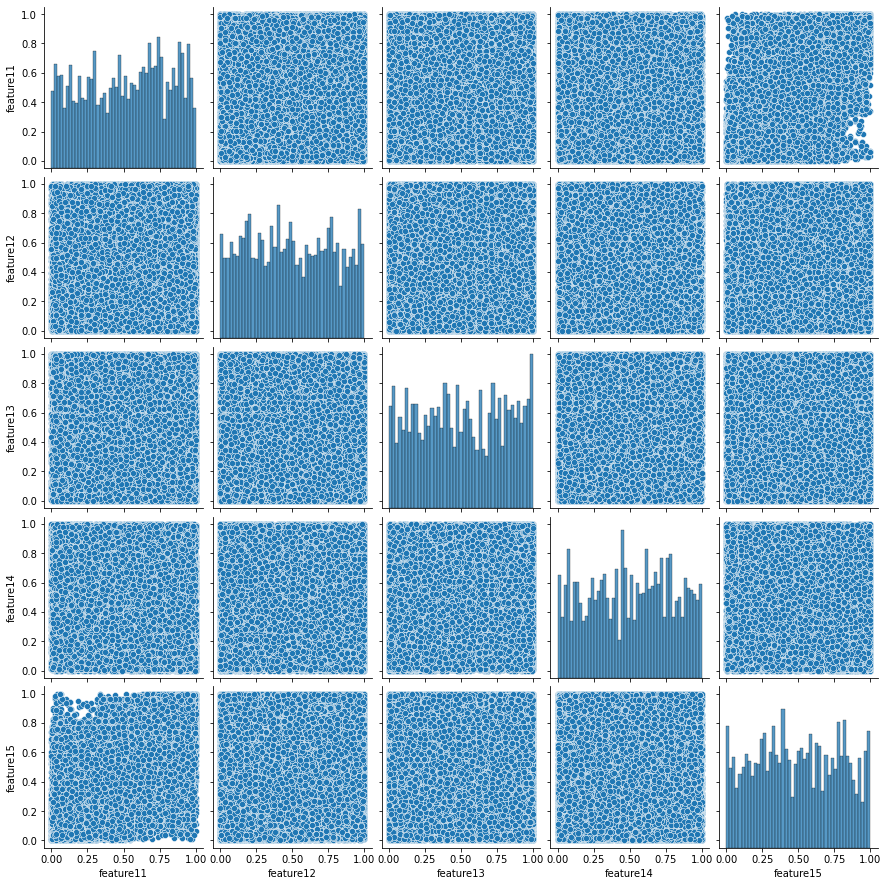

In [10]:
sns.pairplot(
    numerai_df,
    x_vars=["feature11", "feature12", "feature13", "feature14", "feature15"],
    y_vars=["feature11", "feature12", "feature13", "feature14", "feature15"],
)

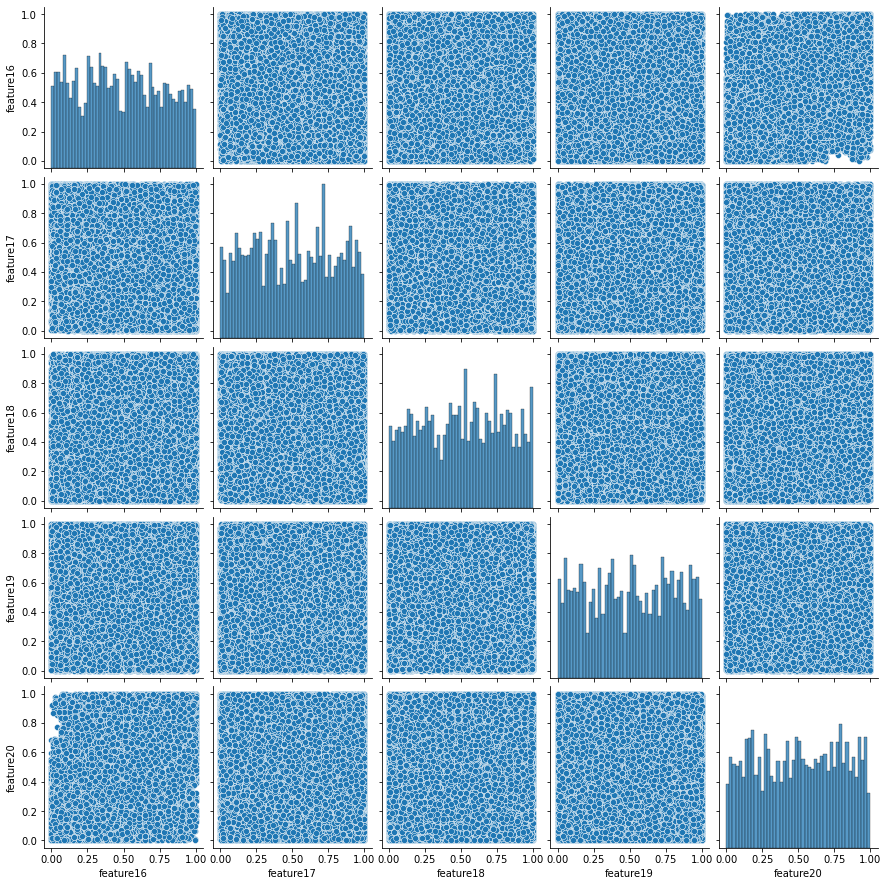

In [11]:
sns.pairplot(
    numerai_df,
    x_vars=["feature16", "feature17", "feature18", "feature19", "feature20"],
    y_vars=["feature16", "feature17", "feature18", "feature19", "feature20"],
)

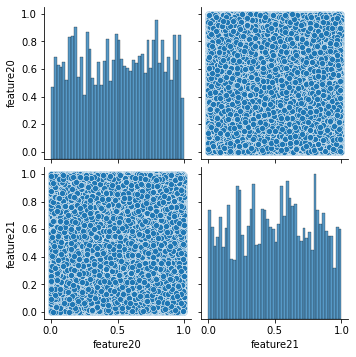

In [12]:
sns.pairplot(
    numerai_df,
    x_vars=["feature20", "feature21"],
    y_vars=["feature20", "feature21"],
)

Plot histogram of the target column to visual check if there is an imbalance.

<AxesSubplot:xlabel='target', ylabel='Count'>

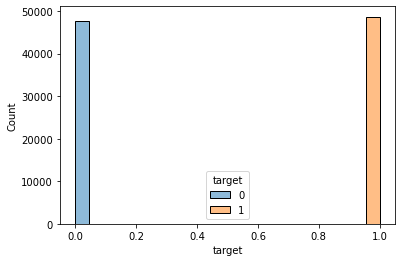

In [13]:
sns.histplot(data = numerai_df, x='target', hue='target')

Check the counts of both classes of the target columns to see the proportion of both the classes.

In [14]:
numerai_df.target.value_counts()

1    48658
0    47662
Name: target, dtype: int64

Ploting correlation matrix of all the columns.

In [15]:
corr_mat = numerai_df.corr()

<AxesSubplot:>

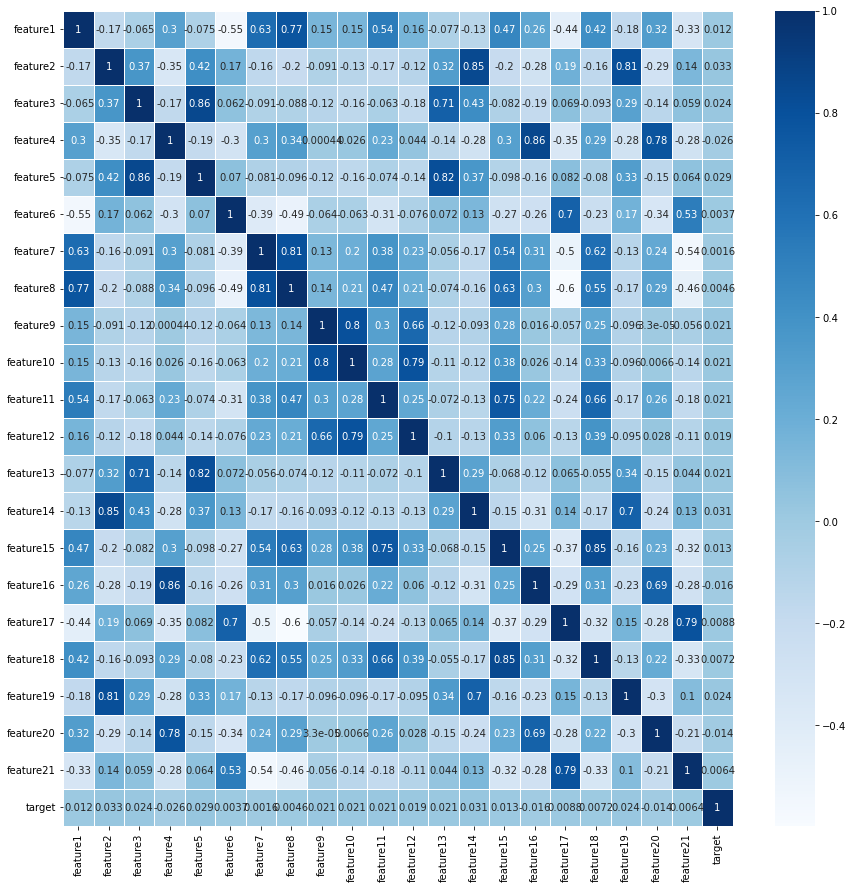

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat, cmap='Blues', annot=True, linewidths=1)

*From the correlation matrix, there doesn't seem to be a need to remove any feature before fitting the models.*

Check the descriptive statistics of all the columns.

In [17]:
numerai_df.describe()

feature1      feature2      feature3      feature4      feature5  \
count  96320.000000  96320.000000  96320.000000  96320.000000  96320.000000   
mean       0.513432      0.506927      0.507154      0.500429      0.496540   
std        0.291883      0.294966      0.288491      0.288273      0.292144   
min        0.000007      0.000204      0.000000      0.000000      0.000000   
25%        0.255401      0.258564      0.254610      0.253186      0.240262   
50%        0.526304      0.506172      0.498442      0.494379      0.492808   
75%        0.761117      0.765010      0.768284      0.755930      0.753559   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           feature6      feature7      feature8      feature9     feature10  \
count  96320.000000  96320.000000  96320.000000  96320.000000  96320.000000   
mean       0.503643      0.493139      0.513023      0.506757      0.476588   
std        0.284723      0.283881      0.289081      0.293665      0.295158   
min        0.000459      0.000000      0.000000      0.000000      0.000000   
25%        0.265446      0.252820      0.270036      0.257270      0.216664   
50%        0.507879      0.490664      0.511877      0.502280      0.462406   
75%        0.742136      0.732723      0.778967      0.768983      0.732957   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...     feature13     feature14     feature15     feature16  \
count  ...  96320.000000  96320.000000  96320.000000  96320.000000   
mean   ...      0.509695      0.505092      0.497713      0.481852   
std    ...      0.296481      0.286345      0.284680      0.284309   
min    ...      0.000000      0.000000      0.000202      0.000000   
25%    ...      0.258271      0.266089      0.259642      0.247953   
50%    ...      0.504425      0.512763      0.495784      0.475910   
75%    ...      0.770795      0.750388      0.751104      0.716566   
max    ...      1.000000      1.000000      1.000000      1.000000   

          feature17     feature18     feature19     feature20     feature21  \
count  96320.000000  96320.000000  96320.000000  96320.000000  96320.000000   
mean       0.501077      0.506695      0.502683      0.505865      0.500040   
std        0.286573      0.285243      0.292442      0.286866      0.280940   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.254976      0.258646      0.254647      0.254020      0.259582   
50%        0.500628      0.516666      0.505049      0.508480      0.514490   
75%        0.737164      0.743056      0.761854      0.762005      0.739907   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             target  
count  96320.000000  
mean       0.505170  
std        0.499976  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  

[8 rows x 22 columns]

Create seperate sets of features and target.

In [18]:
X = numerai_df.drop(columns='target')
y = numerai_df.target

Import library for splitting data into training ana test sets.

In [19]:
from sklearn.model_selection import train_test_split

Create a test set of 20% of the data from original data set.

**NOTE:** Since the target values are almost balanced, stratification of split based on target column was not done.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Coding Reference:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 

Check the number of rows and columns of features and target of both training and test sets of data.

In [21]:
X_train.shape

(77056, 21)

In [22]:
y_train.shape

(77056,)

In [23]:
X_test.shape

(19264, 21)

In [24]:
y_test.shape

(19264,)

Import library to save data and models.

In [25]:
import pickle

Save a test set of features into a pickle file.

In [26]:
with open ('test_features.pickle', 'wb') as f:
    pickle.dump(X_test, f)

Coding Refernce for pickle file creation:

https://www.youtube.com/watch?v=KfnhNlD8WZI 

Save a test set of target into a pickle file.

In [27]:
with open ('test_targets.pickle', 'wb') as f:
    pickle.dump(y_test, f)

#### Preperation of SVM model

Import library for SVM classifier module.

In [28]:
from sklearn.svm import SVC

Create a baseline model as a start, without assigning any arguments to the SVM classifier object.

In [29]:
baseline_model = SVC()

Import library for performing cross validation.

In [30]:
from sklearn.model_selection import cross_val_score

Perform a 5 fold cross validation of the baseline model with complete training data set.

In [31]:
baseline_model_cv_scores = cross_val_score(baseline_model, X_train, y_train, cv=5)

In [32]:
baseline_model_cv_scores

array([0.51985466, 0.51885017, 0.51904484, 0.52469016, 0.51398352])

Take the average of cross validation scores for all the 5 folds.

In [33]:
baseline_model_cv_scores.mean()

0.519284668682646

Check the parameteres of the baseline model.

In [34]:
baseline_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

*To improve the performance of the model, hyperparameter tuning is the way and one standard way to do it to perform series of grid search for different hyperparameters. But, to perform grid search with all the 21 features is computationally expensive. So, principle component analysis is to be done to create components that capture the variance among features of the data and represent them in lower dimensions. Variance is key factor in training of models. Hence, its computationally efficient to perform grid search on the principle components with lower dimension and find the best model for principle components. Thereafter, parameters of that model can be used to create the imporved best model for the original 21 features.*

Import library to perform principle component analysis.

In [35]:
from sklearn.decomposition import PCA

Create components that would capture 95% of variance.

In [36]:
pca1 = PCA(0.95)

X_pca1 = pca1.fit_transform(X)
X_pca1.shape

(96320, 13)

*It can be seen that 13 components capture 95% variance.*

Check the variance captured by each of the 13 principle components.

In [37]:
pca1.explained_variance_ratio_

array([0.30958822, 0.15776834, 0.12775901, 0.07729412, 0.06770742,
       0.06300745, 0.03847588, 0.03339099, 0.01986345, 0.017255  ,
       0.01379489, 0.01297126, 0.01184221])

*It can be observed that the first six principle components, which are half of the total capturing 95% variance, capture more than 70% of the variance.*

So, its computationally even more effective to create a set of six principle components and then perform grid search on them.

In [38]:
pca2 = PCA(n_components=6)

X_pca2 = pca2.fit_transform(X)
X_pca2.shape

(96320, 6)

Cross check that the six principle components capture more than 70% variance.

In [39]:
pca2.explained_variance_ratio_

array([0.30958822, 0.15776834, 0.12775901, 0.07729412, 0.06770742,
       0.06300745])

PCA Coding Refernces:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html ,

https://www.youtube.com/watch?v=8klqIM9UvAc

In [40]:
X_train_pca2, X_test_pca2, y_train_pca2, y_test_pca2 = train_test_split(X_pca2, y, test_size=0.2, random_state=42)

In [41]:
X_train_pca2.shape

(77056, 6)

Create a base model for principle components.

In [42]:
pca2_base_model = SVC()

In [43]:
pca2_base_model_cv_scores = cross_val_score(pca2_base_model, X_train_pca2, y_train_pca2, cv=5)

In [44]:
pca2_base_model_cv_scores

array([0.51777835, 0.51378885, 0.52456038, 0.52170528, 0.51657907])

In [45]:
pca2_base_model_cv_scores.mean()

0.518882385590104

In [46]:
pca2_base_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Create a dictionary of kernels to find the kernal with best model score through grid search.

In [47]:
param_grid_kernel = {'kernel': ['linear','rbf', 'ploy', 'sigmoid']}

Import library to perform grid search.

**NOTE:** To get cross validated scores for grid search, GridSearchCV is used.

In [48]:
from sklearn.model_selection import GridSearchCV

Pass the base model and the dictionary of kernals as parameters to grid search object, to search for best kernal for the model.

In [49]:
clf_pca2_gscv_kernel = GridSearchCV(SVC(), param_grid_kernel)

Fit the grid search object to the set of six principle components of the training data.

In [50]:
clf_pca2_gscv_kernel.fit(X_train_pca2, y_train_pca2)

C:\Users\jraja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jraja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jraja\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\jraja\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", l

GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'rbf', 'ploy', 'sigmoid']})

Create a pandas data frame of the grid search result, for easy viewing.

In [51]:
df_pca2_gscv_kernel = pd.DataFrame(clf_pca2_gscv_kernel.cv_results_)

In [52]:
df_pca2_gscv_kernel.shape

(4, 14)

Print the data frame of grid search.

In [53]:
df_pca2_gscv_kernel

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_kernel  \
0      94.920661      4.312831        17.549296        0.158530       linear   
1     136.921610      1.576239        72.016716        3.086338          rbf   
2       0.009497      0.007757         0.000000        0.000000         ploy   
3     112.748113      7.384083        17.337520        0.758511      sigmoid   

                  params  split0_test_score  split1_test_score  \
0   {'kernel': 'linear'}           0.514923           0.510804   
1      {'kernel': 'rbf'}           0.517778           0.513789   
2     {'kernel': 'ploy'}                NaN                NaN   
3  {'kernel': 'sigmoid'}           0.498053           0.500357   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.520927           0.519499           0.515087         0.516248   
1           0.524560           0.521705           0.516579         0.518882   
2                NaN                NaN                NaN              NaN   
3           0.498151           0.501914           0.499708         0.499637   

   std_test_score  rank_test_score  
0        0.003611                2  
1        0.003813                1  
2             NaN                4  
3        0.001444                3

Check the best score out of scores for different kernels of the grid search.

In [54]:
clf_pca2_gscv_kernel.best_score_

0.518882385590104

Check the best performing kernel of the grid search.

In [55]:
clf_pca2_gscv_kernel.best_params_

{'kernel': 'rbf'}

Grid Search Coding Refernces:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV ,

https://www.youtube.com/watch?v=HdlDYng8g9s 

*Over multiple runs of the script it was observed that the best performing kernel of the grid search changes sometimes. Therefore, it is assigned a variable that will have the value of whatever the best performing kernel is.*

In [56]:
best_kernel = '{}'.format(clf_pca2_gscv_kernel.best_params_.get('kernel'))

In [57]:
best_kernel

'rbf'

Create another object of classifier passing the best kernel from grid search as an argument.

In [58]:
pca2_base_model_improve1 = SVC(kernel=best_kernel, random_state=42)

Create a dictionary of gamma values to find the gamma with best model score through grid search.

In [59]:
param_grid_gamma = {'gamma': [0.001, 0.0001, 'scale', 'auto']}

In [60]:
clf_pca2_gscv_gamma = GridSearchCV(pca2_base_model_improve1, param_grid_gamma)

In [61]:
clf_pca2_gscv_gamma.fit(X_train_pca2, y_train_pca2)

GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'gamma': [0.001, 0.0001, 'scale', 'auto']})

In [62]:
df_pca2_gscv_gamma = pd.DataFrame(clf_pca2_gscv_gamma.cv_results_)

In [63]:
df_pca2_gscv_gamma.shape

(4, 14)

In [64]:
df_pca2_gscv_gamma

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_gamma  \
0     130.123543      3.514592        71.488168        0.876741       0.001   
1     134.222603      6.064657        74.107806        2.476623      0.0001   
2     138.728639      5.235680        71.424722        0.662201       scale   
3     135.733225      1.507631        72.188596        1.313322        auto   

               params  split0_test_score  split1_test_score  \
0    {'gamma': 0.001}           0.521087           0.512945   
1   {'gamma': 0.0001}           0.504088           0.504120   
2  {'gamma': 'scale'}           0.517778           0.513789   
3   {'gamma': 'auto'}           0.522191           0.512491   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.521900           0.524301           0.514827         0.519012   
1           0.504120           0.504120           0.504056         0.504101   
2           0.524560           0.521705           0.516579         0.518882   
3           0.521705           0.521316           0.514892         0.518519   

   std_test_score  rank_test_score  
0        0.004357                1  
1        0.000026                4  
2        0.003813                2  
3        0.004024                3

In [65]:
clf_pca2_gscv_gamma.best_score_

0.5190121200770317

In [66]:
clf_pca2_gscv_gamma.best_params_

{'gamma': 0.001}

*Over multiple runs of the script, it was observed that the best gamma value is consistently 0.001. So, instead of assigning a variable to it, the value is to be directly passed as an argument to the next SVM object.*

In [67]:
pca2_base_model_improve2 = SVC(kernel=best_kernel, gamma=0.001, random_state=42)

Create a dictionary of regularization parameter C to find the C with best model score through grid search.

In [68]:
param_grid_regl = {'C': [0.5,1,1.5]}

In [69]:
clf_pca2_gscv_regl = GridSearchCV(pca2_base_model_improve2, param_grid_regl)

In [70]:
clf_pca2_gscv_regl.fit(X_train_pca2, y_train_pca2)

GridSearchCV(estimator=SVC(gamma=0.001, random_state=42),
             param_grid={'C': [0.5, 1, 1.5]})

In [71]:
df_pca2_gscv_regl = pd.DataFrame(clf_pca2_gscv_regl.cv_results_)

In [72]:
df_pca2_gscv_regl.shape

(3, 14)

In [73]:
df_pca2_gscv_regl

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0     134.176675      4.764256        73.767724        1.312914     0.5   
1     131.464587      5.832589        71.931937        0.331075       1   
2     128.966232      0.395477        71.787944        0.323731     1.5   

       params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.5}           0.524332           0.513075           0.520797   
1    {'C': 1}           0.521087           0.512945           0.521900   
2  {'C': 1.5}           0.520374           0.513270           0.521381   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.523392           0.516125         0.519544        0.004309   
1           0.524301           0.514827         0.519012        0.004357   
2           0.522484           0.515541         0.518610        0.003570   

   rank_test_score  
0                1  
1                2  
2                3

In [74]:
clf_pca2_gscv_regl.best_score_

0.5195441654442983

In [75]:
clf_pca2_gscv_regl.best_params_

{'C': 0.5}

In [76]:
best_regl = clf_pca2_gscv_regl.best_params_.get('C')

In [77]:
best_regl

0.5

*Over multiple runs of the script it was observed that the best performing C of the grid search changes sometimes. Therefore, it is assigned a variable that will have the value of whatever the best performing C is.*

After tuning the hyperparameters, a SVM classifier object with all the best parameters obtained from grid search is created.

In [78]:
pca2_base_model_improve3 = SVC(C=best_regl, kernel=best_kernel, gamma=0.001, random_state=42)

To check the generalized accuracy of this model over the priciple components, a 5 fold cross validation was performed.

In [79]:
pca2_base_model_improve3_cv_scores = cross_val_score(pca2_base_model_improve3, X_train_pca2, y_train_pca2, cv=5)

In [80]:
pca2_base_model_improve3_cv_scores

array([0.52433169, 0.51307508, 0.52079683, 0.52339238, 0.51612485])

In [81]:
pca2_base_model_improve3_cv_scores.mean()

0.5195441654442983

Then, another SVM classifier object is created with all the best parameters obtained from grid search, but this time to fit it to the original training data of 21 features.

In [82]:
best_pca_model = SVC(C=best_regl, kernel=best_kernel, gamma=0.001, random_state=42)

To get an estimate of the generalized model score, a five fold cross validation was performed.

In [83]:
best_pca_model_cv_scores = cross_val_score(best_pca_model, X_train, y_train, cv=5)

In [84]:
best_pca_model_cv_scores

array([0.52368284, 0.51476218, 0.51988839, 0.52494971, 0.51391863])

In [85]:
best_pca_model_cv_scores.mean()

0.519440351919479

To see how much imporvement in model accuracy did the hyperparameter tuning bring, the mean cross validation score of the baseline model and the best model fit from grid search are to be compared.

In [86]:
perc_change = ((best_pca_model_cv_scores.mean() - baseline_model_cv_scores.mean())/baseline_model_cv_scores.mean()) * 100

perc_change

0.029980326056604414

In [87]:
print("The best PCA model made an improvement of just {} % over the baseline model.".format(perc_change))

The best PCA model made an improvement of just 0.029980326056604414 % over the baseline model.


*Although a very small amount, but there is a slight improvement in the mean cross validation score over that of the baseline model. So, this can be considered the best SVM model for the training data.*

The best SVM classifer object is to be created with all the best parametres from above, but this time even to check its performane over the test data set.

In [88]:
best_SVM_model = SVC(C=best_regl, kernel=best_kernel, gamma=0.001, random_state=42, verbose=True)

Import library required to calculate time taken for training a model.

In [89]:
import time

Train the best SVM model over the training data consisting of all 21 features and also calculate the time taken for the training.

In [90]:
SVM_start_time = time.time()
best_SVM_model.fit(X_train, y_train)
SVM_end_time = time.time()

[LibSVM]

In [91]:
SVM_training_time = SVM_end_time - SVM_start_time

In [92]:
SVM_training_time

263.5207209587097

*It took 263.52 seconds for the best SVM model to get trained.*

Check the paramerters of the best SVM model.

In [93]:
best_SVM_model.get_params()

{'C': 0.5,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.001,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': True}

Save the best SVM model into a pickle file to export it and test it directly over test set in a different notebook.

In [94]:
with open ('best_SVM_model.pickle', 'wb') as f:
    pickle.dump(best_SVM_model, f)

Load best SVM model from the pickle file that was created above, which will be tested hereafter.

In [95]:
with open ('best_SVM_model.pickle', 'rb') as f:
    best_SVM_model_loaded = pickle.load(f)

Load features of test data from the pickle file that was created above, which will be tested hereafter.

In [96]:
with open ('test_features.pickle', 'rb') as f:
    X_test_loaded = pickle.load(f)

Load target of test data from the pickle file that was created above, which will be tested hereafter.

In [97]:
with open ('test_targets.pickle', 'rb') as f:
    y_test_loaded = pickle.load(f)

Predict targets from features of test data.

In [98]:
y_predict_svm = best_SVM_model_loaded.predict(X_test_loaded)

Evaluate training score of the best SVM model.

In [99]:
svm_training_score = best_SVM_model_loaded.score(X_train, y_train)

In [100]:
svm_training_score

0.5199984426910299

Evaluate test score of the best SVM model.

In [101]:
svm_test_score = best_SVM_model_loaded.score(X_test_loaded, y_test_loaded)

In [102]:
svm_test_score

0.5169746677740864

Coding Reference for all SVM commands:

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html 

Import library required for creating ROC curve and calculating AUC.

In [103]:
from sklearn.metrics import roc_curve, auc

Obtain **false positive rate**, **true positive rate** and thresholds for best SVM model.

In [104]:
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test_loaded, y_predict_svm)

Calculate AUC for best SVM model over test data.

In [105]:
AUC_svm = auc(svm_fpr, svm_tpr)
AUC_svm

0.513357108892059

Plot ROC curve for best SVM model over test data.

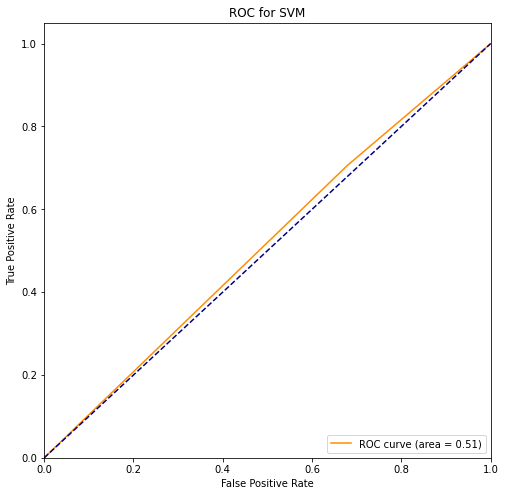

In [106]:
plt.figure(figsize=(8,8))
plt.plot(svm_fpr, svm_tpr, color="darkorange", label="ROC curve (area = %0.2f)" % AUC_svm)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for SVM")
plt.legend(loc="lower right")
plt.show()

Coding Reference for ROC and AUC:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html# 

Import library required for plotting confusion matrix.

In [107]:
from sklearn.metrics import plot_confusion_matrix

Plot confusion matrix for best SVM model over test data.

C:\Users\jraja\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


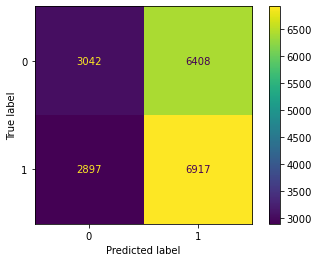

In [108]:
plot_confusion_matrix(best_SVM_model_loaded, X_test_loaded, y_test_loaded)
plt.show()

Coding Reference for Confusion matrix:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html 

Import library for obtaining classification report.

In [109]:
from sklearn.metrics import classification_report

Produce Classification report of best SVM model over test data.

In [110]:
print("Classification Report for SVM")

print(classification_report(y_test_loaded, y_predict_svm))

Classification Report for SVM
              precision    recall  f1-score   support

           0       0.51      0.32      0.40      9450
           1       0.52      0.70      0.60      9814

    accuracy                           0.52     19264
   macro avg       0.52      0.51      0.50     19264
weighted avg       0.52      0.52      0.50     19264



Coding Reference for Classification Report:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html 

#### Preperation of MLP model

Import library for MLP classifier.

In [111]:
from sklearn.neural_network import MLPClassifier

Create a baseline MLP model without passing any arguments to the classifier object.

In [112]:
baseline_model_MLP = MLPClassifier(random_state=42)

Perform a 5 fold cross validation of the baseline model with complete training data set.

In [113]:
baseline_model_MLP_cv_scores = cross_val_score(baseline_model_MLP, X_train, y_train, cv=5)

C:\Users\jraja\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\neural_network\_multi

In [114]:
baseline_model_MLP_cv_scores

array([0.51920581, 0.51625462, 0.5152164 , 0.51502174, 0.50814353])

Take the average of cross validation scores for all the 5 folds.

In [115]:
baseline_model_MLP_cv_scores.mean()

0.5147684224798695

Check the parameters of the baseline model.

In [116]:
baseline_model_MLP.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

*While performing 5 fold cross validation above, it was observed that there were a series of errors of optimization not converging even after reaching the maximum number of iterations of 200. It is a good idea to see how the baseline model performance changes for higher value of maximum number of iterations. So, another version of baseline model with 500 (randomly chosen) maximum number of iterations is created and a 5 fold cross validation is performed.*

In [117]:
baseline_model_MLP_iter500 = MLPClassifier(max_iter=500, random_state=42)

In [118]:
baseline_model_MLP_iter500_cv_scores = cross_val_score(baseline_model_MLP_iter500, X_train, y_train, cv=5)

In [119]:
baseline_model_MLP_iter500_cv_scores

array([0.51083571, 0.50704043, 0.51599507, 0.52196483, 0.50691065])

In [120]:
baseline_model_MLP_iter500_cv_scores.mean()

0.5125493370227444

*It can be seen that with increase in maimum number of iterations to 500 from 200 in original baseline model, although the optimization has converged for all the 5 folds of cross valiadation, but the mean cross validation score has decreased by few decimal points. So, the original baseline model seems to be better than the one with increase in maximum number of iterations.*

As a starting point of tuning the number of hidden layers and number of neurons in each layer, we will start with a single hidden layer based on universal approximation theorem. As per rules of thumb, we choose the number of neurons as follows:

1) 10 - which is between the size of input and output layers.

2) 16 - which is 2/3 the size of input layer + size of output layer.

3) 30 - which is less than twice the size of the input layer.

These concepts have adapted from: https://www.heatonresearch.com/2017/06/01/hidden-layers.html .

In addition we also use 50 and 80 to see how the model scores change as they approach 100, which is the number of neurons in the original baseline model.

In [121]:
param_grid_hidlayers1 = {'hidden_layer_sizes':[10, 16, 30, 50, 80]}

In [122]:
mlp_gscv_hidlayers1 = GridSearchCV(baseline_model_MLP, param_grid_hidlayers1)

In [123]:
mlp_gscv_hidlayers1.fit(X_train, y_train)

C:\Users\jraja\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(estimator=MLPClassifier(random_state=42),
             param_grid={'hidden_layer_sizes': [10, 16, 30, 50, 80]})

In [124]:
df_mlp_gscv_hidlayers1 = pd.DataFrame(mlp_gscv_hidlayers1.cv_results_)

In [125]:
df_mlp_gscv_hidlayers1.shape

(5, 14)

In [126]:
df_mlp_gscv_hidlayers1

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.522182      0.466128         0.006640    3.354868e-03   
1       3.729448      0.600224         0.006401    3.200674e-03   
2      11.277711      4.408475         0.008001    9.608003e-07   
3      28.237736      5.614295         0.019126    3.988105e-03   
4      54.907769     14.727639         0.041934    7.179537e-03   

  param_hidden_layer_sizes                      params  split0_test_score  \
0                       10  {'hidden_layer_sizes': 10}           0.524007   
1                       16  {'hidden_layer_sizes': 16}           0.524916   
2                       30  {'hidden_layer_sizes': 30}           0.522645   
3                       50  {'hidden_layer_sizes': 50}           0.517389   
4                       80  {'hidden_layer_sizes': 80}           0.516546   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.518007           0.520667           0.517942           0.518591   
1           0.523782           0.522808           0.525015           0.515476   
2           0.521900           0.526312           0.520862           0.516449   
3           0.514568           0.516904           0.522419           0.507430   
4           0.516384           0.513270           0.513594           0.512102   

   mean_test_score  std_test_score  rank_test_score  
0         0.519843        0.002305                3  
1         0.522399        0.003555                1  
2         0.521634        0.003177                2  
3         0.515742        0.004881                4  
4         0.514379        0.001775                5

In [127]:
mlp_gscv_hidlayers1.best_params_

{'hidden_layer_sizes': 16}

In [128]:
mlp_gscv_hidlayers1.best_score_

0.52239926136331

The best 3 configurations from previous grid search are taken and another layer with 2 neurons is added.

In [129]:
param_grid_hidlayers2 = {'hidden_layer_sizes':[(10,2), (16,2), (30,2)]}

In [130]:
mlp_gscv_hidlayers2 = GridSearchCV(baseline_model_MLP, param_grid_hidlayers2)

In [131]:
mlp_gscv_hidlayers2.fit(X_train, y_train)

GridSearchCV(estimator=MLPClassifier(random_state=42),
             param_grid={'hidden_layer_sizes': [(10, 2), (16, 2), (30, 2)]})

In [132]:
df_mlp_gscv_hidlayers2 = pd.DataFrame(mlp_gscv_hidlayers2.cv_results_)

In [133]:
df_mlp_gscv_hidlayers2

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.569796      0.476980         0.004767        0.003892   
1       5.272166      2.591165         0.004800        0.003919   
2      12.384293      6.129958         0.009427        0.005803   

  param_hidden_layer_sizes                           params  \
0                  (10, 2)  {'hidden_layer_sizes': (10, 2)}   
1                  (16, 2)  {'hidden_layer_sizes': (16, 2)}   
2                  (30, 2)  {'hidden_layer_sizes': (30, 2)}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.517000           0.520732           0.524755           0.522030   
1           0.524786           0.515281           0.519824           0.519564   
2           0.522969           0.521705           0.526831           0.517423   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.518915         0.520686        0.002649                1  
1           0.515346         0.518960        0.003511                3  
2           0.512491         0.520284        0.004920                2

In [134]:
mlp_gscv_hidlayers2.best_params_

{'hidden_layer_sizes': (10, 2)}

In [135]:
mlp_gscv_hidlayers2.best_score_

0.5206863019954517

*It can be seen that the increase in number of hidden layers has decreased the model score a bit. To check if this was the effect of total number of neurons in all hidden layers, the number of neurons in the first hidden layer is reduced in the next grid search.*

In [136]:
param_grid_hidlayers3 = {'hidden_layer_sizes':[(5,5), (8,8), (15,15)]}

In [137]:
mlp_gscv_hidlayers3 = GridSearchCV(baseline_model_MLP, param_grid_hidlayers3)

In [138]:
mlp_gscv_hidlayers3.fit(X_train, y_train)

GridSearchCV(estimator=MLPClassifier(random_state=42),
             param_grid={'hidden_layer_sizes': [(5, 5), (8, 8), (15, 15)]})

In [139]:
df_mlp_gscv_hidlayers3 = pd.DataFrame(mlp_gscv_hidlayers3.cv_results_)

In [140]:
df_mlp_gscv_hidlayers3

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.018128      0.587413         0.006357        0.003179   
1       2.765578      0.442661         0.006376        0.003188   
2       8.195786      4.356831         0.012734        0.003907   

  param_hidden_layer_sizes                            params  \
0                   (5, 5)    {'hidden_layer_sizes': (5, 5)}   
1                   (8, 8)    {'hidden_layer_sizes': (8, 8)}   
2                 (15, 15)  {'hidden_layer_sizes': (15, 15)}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.522645           0.516709           0.522808           0.521381   
1           0.517000           0.516839           0.519759           0.523068   
2           0.522580           0.518656           0.515671           0.525728   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.518915         0.520492        0.002349                1  
1           0.515736         0.518480        0.002650                3  
2           0.513789         0.519285        0.004383                2

In [141]:
mlp_gscv_hidlayers3.best_params_

{'hidden_layer_sizes': (5, 5)}

In [142]:
mlp_gscv_hidlayers3.best_score_

0.5204915625891577

*It is now clear that despite having the same number of total neurons in all the hidden layers, as that in the configuration of single hidden layer, the model scores have come down further. So, it seems single hidden layer gives better model scores than mutiple hidden layers. **The best score for single hidden layer configuration was given by 16 neurons**. To cover for the uncertainity that a different number of neurons may give the best score in a different run of that grid search, the number of neurons with best score is to be assined a variable, which is then to be passed as an argument to the MLP model object.*

In [143]:
best_hid_layers = mlp_gscv_hidlayers1.best_params_.get('hidden_layer_sizes')

In [144]:
best_hid_layers

16

In [145]:
baseline_model_MLP_improve1 = MLPClassifier(hidden_layer_sizes=best_hid_layers, random_state=42)

Create a dictionary of activation functions to find the activation with best model score through grid search.

In [146]:
param_grid_activ = {'activation':['identity', 'logistic', 'tanh', 'relu']}

In [147]:
mlp_gscv_active = GridSearchCV(baseline_model_MLP_improve1, param_grid_activ)

In [148]:
mlp_gscv_active.fit(X_train, y_train)

GridSearchCV(estimator=MLPClassifier(hidden_layer_sizes=16, random_state=42),
             param_grid={'activation': ['identity', 'logistic', 'tanh',
                                        'relu']})

In [149]:
df_mlp_gscv_active = pd.DataFrame(mlp_gscv_active.cv_results_)

In [150]:
df_mlp_gscv_active

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.090282      0.237893         0.004926        0.006386   
1       1.945523      0.449266         0.009376        0.007655   
2       2.757635      0.369909         0.006331        0.007754   
3       3.619060      0.644248         0.006252        0.007657   

  param_activation                      params  split0_test_score  \
0         identity  {'activation': 'identity'}           0.521282   
1         logistic  {'activation': 'logistic'}           0.523423   
2             tanh      {'activation': 'tanh'}           0.517454   
3             relu      {'activation': 'relu'}           0.524916   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.519499           0.526183           0.525728           0.517423   
1           0.518201           0.522354           0.524625           0.521511   
2           0.525404           0.527221           0.526767           0.517423   
3           0.523782           0.522808           0.525015           0.515476   

   mean_test_score  std_test_score  rank_test_score  
0         0.522023        0.003438                3  
1         0.522023        0.002178                4  
2         0.522854        0.004462                1  
3         0.522399        0.003555                2

In [151]:
mlp_gscv_active.best_params_

{'activation': 'tanh'}

In [152]:
mlp_gscv_active.best_score_

0.522853579210538

*It can be seen that the model score has surged up a bit with change of activation function. However, the best activation function changes on different runs of the grid search. So, the best activation function resulting from the grid search is assigned a variable, which is then passed as an argument in the classifer object.*

In [153]:
best_activation = '{}'.format(mlp_gscv_active.best_params_.get('activation'))

In [154]:
best_activation

'tanh'

In [155]:
baseline_model_MLP_improve2 = MLPClassifier(hidden_layer_sizes=best_hid_layers, activation=best_activation, random_state=42)

Create a dictionary of weight optimization solver to find the solver with best model score through grid search.

In [156]:
param_grid_solv = {'solver':['lbfgs', 'sgd', 'adam']}

In [157]:
mlp_gscv_solv = GridSearchCV(baseline_model_MLP_improve2, param_grid_solv)

In [158]:
mlp_gscv_solv.fit(X_train, y_train)

C:\Users\jraja\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

GridSearchCV(estimator=MLPClassifier(activation='tanh', hidden_layer_sizes=16,
                                     random_state=42),
             param_grid={'solver': ['lbfgs', 'sgd', 'adam']})

In [159]:
df_mlp_gscv_solv = pd.DataFrame(mlp_gscv_solv.cv_results_)

In [160]:
df_mlp_gscv_solv

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_solver  \
0       7.653683      0.427560         0.007849        0.006987        lbfgs   
1       2.866636      0.073824         0.006307        0.007726          sgd   
2       2.700471      0.415363         0.006250        0.007654         adam   

                params  split0_test_score  split1_test_score  \
0  {'solver': 'lbfgs'}           0.521542           0.517942   
1    {'solver': 'sgd'}           0.516805           0.519175   
2   {'solver': 'adam'}           0.517454           0.525404   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.518850           0.523263           0.514697         0.519259   
1           0.515930           0.519434           0.516384         0.517546   
2           0.527221           0.526767           0.517423         0.522854   

   std_test_score  rank_test_score  
0        0.002965                2  
1        0.001465                3  
2        0.004462                1

In [161]:
mlp_gscv_solv.best_params_

{'solver': 'adam'}

In [162]:
mlp_gscv_solv.best_score_

0.522853579210538

*After mutiple runs of the above grid search adam was consistently the best solver for weight optimization. In addition, **adam** and **sgd** solvers allow tuning few other hyperparameters, which can't be done with **lbfgs**. Also, **lbfgs** is more suitable for smaller datasets. So, for this case, the solver **adam** is directly passed as an argument to the classifier object, rather than being assigned to a variable.*

In [163]:
baseline_model_MLP_improve3 = MLPClassifier(hidden_layer_sizes=best_hid_layers, activation=best_activation,
                                            solver='adam', random_state=42)

Create a dictionary of L2 regularization parameter alpha to find the alpha with best model score through grid search.

In [164]:
param_grid_alpha = {'alpha':[0.0001, 0.001, 0.01]}

In [165]:
mlp_gscv_alpha = GridSearchCV(baseline_model_MLP_improve3, param_grid_alpha)

In [166]:
mlp_gscv_alpha.fit(X_train, y_train)

GridSearchCV(estimator=MLPClassifier(activation='tanh', hidden_layer_sizes=16,
                                     random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.01]})

In [167]:
df_mlp_gscv_alpha = pd.DataFrame(mlp_gscv_alpha.cv_results_)

In [168]:
df_mlp_gscv_alpha

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       2.760953      0.457261         0.007862        0.006983      0.0001   
1       2.692640      0.423212         0.006250        0.007655       0.001   
2       2.921441      0.305834         0.003694        0.006067        0.01   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.517454           0.525404           0.527221   
1   {'alpha': 0.001}           0.517973           0.525339           0.526831   
2    {'alpha': 0.01}           0.518557           0.524690           0.526767   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.526767           0.517423         0.522854        0.004462   
1           0.526961           0.517423         0.522905        0.004294   
2           0.525923           0.516514         0.522490        0.004150   

   rank_test_score  
0                2  
1                1  
2                3

*Over multiple runs, the model scores for all the three values of **alpha**, which offers **L2 regularization**, have been close. But the best performing alpha was not consistent. So, the best performing alpha value is to be assigned a variable rather the passing it directly to the classifier object.*

In [169]:
mlp_gscv_alpha.best_params_

{'alpha': 0.001}

In [170]:
mlp_gscv_alpha.best_score_

0.5229054834467841

In [171]:
best_aplha = mlp_gscv_alpha.best_params_.get('alpha')

In [172]:
best_aplha

0.001

In [173]:
baseline_model_MLP_improve4 = MLPClassifier(hidden_layer_sizes=best_hid_layers, activation=best_activation,
                                            solver='adam', alpha=best_aplha, random_state=42)

Create a dictionary of batch size of mini batches for optimization to find the batch size with best model score through grid search.

In [174]:
param_grid_batch_size = {'batch_size':[100, 200, 500, 1000, 'auto']}

In [175]:
mlp_gscv_batch_size = GridSearchCV(baseline_model_MLP_improve4, param_grid_batch_size)

In [176]:
mlp_gscv_batch_size.fit(X_train,y_train)

GridSearchCV(estimator=MLPClassifier(activation='tanh', alpha=0.001,
                                     hidden_layer_sizes=16, random_state=42),
             param_grid={'batch_size': [100, 200, 500, 1000, 'auto']})

In [177]:
df_mlp_gscv_batch_size = pd.DataFrame(mlp_gscv_batch_size.cv_results_)

In [178]:
df_mlp_gscv_batch_size

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.849439      0.727710         0.004928        0.006214   
1       2.837598      0.446604         0.006405        0.005989   
2       1.817877      0.239666         0.004546        0.006185   
3       1.646275      0.285575         0.006266        0.007674   
4       2.760539      0.456543         0.012517        0.006258   

  param_batch_size                  params  split0_test_score  \
0              100     {'batch_size': 100}           0.517519   
1              200     {'batch_size': 200}           0.517973   
2              500     {'batch_size': 500}           0.524267   
3             1000    {'batch_size': 1000}           0.519336   
4             auto  {'batch_size': 'auto'}           0.517973   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.522743           0.519369           0.517358           0.517552   
1           0.525339           0.526831           0.526961           0.517423   
2           0.521446           0.523522           0.524236           0.516255   
3           0.522808           0.524625           0.527026           0.520018   
4           0.525339           0.526831           0.526961           0.517423   

   mean_test_score  std_test_score  rank_test_score  
0         0.518908        0.002054                5  
1         0.522905        0.004294                1  
2         0.521945        0.003025                4  
3         0.522763        0.002861                3  
4         0.522905        0.004294                1

In [179]:
mlp_gscv_batch_size.best_params_

{'batch_size': 200}

In [180]:
mlp_gscv_batch_size.best_score_

0.5229054834467841

*It can be observed that the model scores are same for **batch_size** value **200** and **'auto'**. This is essentially because for 'auto' the batch_size is 200 if no lesser value is assigned, as per sklearn MLPClassifier documentaion ( https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html ). So, it would be better to pass 'auto' which is the defaul value, as an argument to the model object.*

Create a dictionary of learning rate for weight updates to find the learning rate with best model score through grid search.

In [181]:
param_grid_lr = {'learning_rate':['constant', 'invscaling', 'adaptive']}

In [182]:
mlp_gscv_lr = GridSearchCV(baseline_model_MLP_improve4, param_grid_lr)

In [183]:
mlp_gscv_lr.fit(X_train, y_train)

GridSearchCV(estimator=MLPClassifier(activation='tanh', alpha=0.001,
                                     hidden_layer_sizes=16, random_state=42),
             param_grid={'learning_rate': ['constant', 'invscaling',
                                           'adaptive']})

In [184]:
df_mlp_gscv_lr = pd.DataFrame(mlp_gscv_lr.cv_results_)

In [185]:
df_mlp_gscv_lr

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.800505      0.389579         0.006347        0.005875   
1       3.004036      0.587374         0.011907        0.006809   
2       2.752277      0.438076         0.006267        0.007675   

  param_learning_rate                           params  split0_test_score  \
0            constant    {'learning_rate': 'constant'}           0.517973   
1          invscaling  {'learning_rate': 'invscaling'}           0.517973   
2            adaptive    {'learning_rate': 'adaptive'}           0.517973   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.525339           0.526831           0.526961           0.517423   
1           0.525339           0.526831           0.526961           0.517423   
2           0.525339           0.526831           0.526961           0.517423   

   mean_test_score  std_test_score  rank_test_score  
0         0.522905        0.004294                1  
1         0.522905        0.004294                1  
2         0.522905        0.004294                1

In [186]:
mlp_gscv_lr.best_params_

{'learning_rate': 'constant'}

*It can be seen that the model scores for all the three types of learning rate schedules for weight update are same and this behaviour has been observed in multiple runs. So, the best performing one is assigned a variable, which is then passed as an argument to the classifier object.*

In [187]:
best_learning_rate = '{}'.format(mlp_gscv_lr.best_params_.get('learning_rate'))

In [188]:
best_learning_rate

'constant'

In [189]:
baseline_model_MLP_improve5 = MLPClassifier(hidden_layer_sizes=best_hid_layers, activation=best_activation,
                                            solver='adam', alpha=best_aplha, learning_rate=best_learning_rate, random_state=42)

Create a dictionary of initial learning rates to find the initial learning rate with best model score through grid search.

In [190]:
param_grid_lrin = {'learning_rate_init':[0.001, 0.01, 0.1]}

In [191]:
mlp_gscv_lrin = GridSearchCV(baseline_model_MLP_improve5, param_grid_lrin)

In [192]:
mlp_gscv_lrin.fit(X_train, y_train)

GridSearchCV(estimator=MLPClassifier(activation='tanh', alpha=0.001,
                                     hidden_layer_sizes=16, random_state=42),
             param_grid={'learning_rate_init': [0.001, 0.01, 0.1]})

In [193]:
df_mlp_gscv_lrin = pd.DataFrame(mlp_gscv_lrin.cv_results_)

In [194]:
df_mlp_gscv_lrin

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.992707      0.522911         0.007950        0.005069   
1       3.191094      1.026401         0.005226        0.006601   
2       2.389969      0.537358         0.006249        0.007654   

  param_learning_rate_init                         params  split0_test_score  \
0                    0.001  {'learning_rate_init': 0.001}           0.517973   
1                     0.01   {'learning_rate_init': 0.01}           0.516221   
2                      0.1    {'learning_rate_init': 0.1}           0.495912   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.525339           0.526831           0.526961           0.517423   
1           0.496269           0.517877           0.521446           0.515346   
2           0.495880           0.504120           0.513529           0.495944   

   mean_test_score  std_test_score  rank_test_score  
0         0.522905        0.004294                1  
1         0.513432        0.008832                2  
2         0.501077        0.006991                3

*Clearly, the default value of 0.001 gives the best model score. So, its better to keep the initial learning rate to the default value.*

Create a dictionary of maximum iterations to find the maximum iterations with best model score through grid search.

In [195]:
param_grid_maxiter = {'max_iter':[200, 500, 1000, 2000, 4000]}

In [196]:
mlp_gscv_maxiter = GridSearchCV(baseline_model_MLP_improve5, param_grid_maxiter)

In [197]:
mlp_gscv_maxiter.fit(X_train, y_train)

GridSearchCV(estimator=MLPClassifier(activation='tanh', alpha=0.001,
                                     hidden_layer_sizes=16, random_state=42),
             param_grid={'max_iter': [200, 500, 1000, 2000, 4000]})

In [198]:
df_mlp_gscv_maxiter = pd.DataFrame(mlp_gscv_maxiter.cv_results_)

In [199]:
df_mlp_gscv_maxiter

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.834094      0.502437         0.003125        0.006250   
1       2.773742      0.385343         0.004842        0.006472   
2       2.770550      0.405241         0.006126        0.007505   
3       2.748895      0.468170         0.006249        0.007654   
4       2.780834      0.490765         0.015642        0.000031   

  param_max_iter              params  split0_test_score  split1_test_score  \
0            200   {'max_iter': 200}           0.517973           0.525339   
1            500   {'max_iter': 500}           0.517973           0.525339   
2           1000  {'max_iter': 1000}           0.517973           0.525339   
3           2000  {'max_iter': 2000}           0.517973           0.525339   
4           4000  {'max_iter': 4000}           0.517973           0.525339   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.526831           0.526961           0.517423         0.522905   
1           0.526831           0.526961           0.517423         0.522905   
2           0.526831           0.526961           0.517423         0.522905   
3           0.526831           0.526961           0.517423         0.522905   
4           0.526831           0.526961           0.517423         0.522905   

   std_test_score  rank_test_score  
0        0.004294                1  
1        0.004294                1  
2        0.004294                1  
3        0.004294                1  
4        0.004294                1

In [200]:
mlp_gscv_maxiter.best_params_

{'max_iter': 200}

*It can be observed that the scores for all iteration values are same and this pattern was observed in multiple runs. Since, the same score was achieved for iteration value of 200, which is default value. So, its better to keep the maximum number of iterations to its default value, keeping the computational cost low.*

Create a dictionary of momentum values for gradient descent updates to find the momentum with best model score through grid search.

In [201]:
param_grid_momentum = {'momentum':[0.1, 0.3, 0.5, 0.7, 0.9]}

In [202]:
mlp_gscv_momentum = GridSearchCV(baseline_model_MLP_improve5, param_grid_momentum)

In [203]:
mlp_gscv_momentum.fit(X_train, y_train)

GridSearchCV(estimator=MLPClassifier(activation='tanh', alpha=0.001,
                                     hidden_layer_sizes=16, random_state=42),
             param_grid={'momentum': [0.1, 0.3, 0.5, 0.7, 0.9]})

In [204]:
df_mlp_gscv_momentum = pd.DataFrame(mlp_gscv_momentum.cv_results_)

In [205]:
df_mlp_gscv_momentum

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.754171      0.466435         0.009494        0.007753   
1       2.757535      0.424931         0.011337        0.006119   
2       2.695278      0.430900         0.010975        0.006232   
3       2.775526      0.489049         0.000000        0.000000   
4       2.649707      0.438890         0.016303        0.001173   

  param_momentum             params  split0_test_score  split1_test_score  \
0            0.1  {'momentum': 0.1}           0.517973           0.525339   
1            0.3  {'momentum': 0.3}           0.517973           0.525339   
2            0.5  {'momentum': 0.5}           0.517973           0.525339   
3            0.7  {'momentum': 0.7}           0.517973           0.525339   
4            0.9  {'momentum': 0.9}           0.517973           0.525339   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.526831           0.526961           0.517423         0.522905   
1           0.526831           0.526961           0.517423         0.522905   
2           0.526831           0.526961           0.517423         0.522905   
3           0.526831           0.526961           0.517423         0.522905   
4           0.526831           0.526961           0.517423         0.522905   

   std_test_score  rank_test_score  
0        0.004294                1  
1        0.004294                1  
2        0.004294                1  
3        0.004294                1  
4        0.004294                1

In [206]:
mlp_gscv_momentum.best_params_

{'momentum': 0.1}

*It is clear that the model scores for all values of momentum for gradient descent update is the same. So, here too, its better to keep it to the default value of 0.9.*

Create a dictionary of early stopping conditions to find the condition with best model score through grid search.

In [207]:
param_grid_early_stop = {'early_stopping':[False, True]}

In [208]:
mlp_gscv_early_stop = GridSearchCV(baseline_model_MLP_improve5, param_grid_early_stop)

In [209]:
mlp_gscv_early_stop.fit(X_train, y_train)

C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid featur

C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid featur

C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid featur

C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid featur

GridSearchCV(estimator=MLPClassifier(activation='tanh', alpha=0.001,
                                     hidden_layer_sizes=16, random_state=42),
             param_grid={'early_stopping': [False, True]})

In [210]:
df_mlp_gscv_early_stop = pd.DataFrame(mlp_gscv_early_stop.cv_results_)

In [211]:
df_mlp_gscv_early_stop

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.859862      0.492062         0.007644        0.007113   
1       4.004991      1.203024         0.006482        0.005915   

  param_early_stopping                     params  split0_test_score  \
0                False  {'early_stopping': False}           0.517973   
1                 True   {'early_stopping': True}           0.518817   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.525339           0.526831           0.526961           0.517423   
1           0.523198           0.528778           0.524885           0.517942   

   mean_test_score  std_test_score  rank_test_score  
0         0.522905        0.004294                1  
1         0.522724        0.003992                2

*As indicated by the results of the above grid search, the model scores for with and without early stopping is very small. The **default** value is **'False'**. But, as per **sklearn MLPClassifier documentaion** ( https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html ), setting the value to **'True', 10% of the training data is set aside as validation set automatically and training is stopped when there is no further interative improvement in the validation score**. So, from **model generalization** point of view, its better to pass 'True' as an argument to the classifier object.*

Create a MLP classifier model with all the best parameters from above series of grid search.

In [212]:
baseline_model_MLP_improve6 = MLPClassifier(hidden_layer_sizes=best_hid_layers, activation=best_activation,
                                            solver='adam', alpha=best_aplha, learning_rate=best_learning_rate, 
                                            early_stopping=True, random_state=42)

To estimate a gerneralized score of this model, perform a 5 fold cross validation over the training data.

In [213]:
baseline_model_MLP_improve6_cv_scores = cross_val_score(baseline_model_MLP_improve6, X_train, y_train, cv=5)

C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid featur

C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid featur

C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid featur

C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid featur

In [214]:
baseline_model_MLP_improve6_cv_scores

array([0.51881651, 0.52319772, 0.52877815, 0.52488482, 0.51794173])

In [215]:
baseline_model_MLP_improve6_cv_scores.mean()

0.5227237840956899

To see how much imporvement in model accuracy did the hyperparameter tuning bring, the mean cross validation score of the baseline model and the best model fit from grid search are to be compared.

In [216]:
perc_change_MLP = ((baseline_model_MLP_improve6_cv_scores.mean() - baseline_model_MLP_cv_scores.mean())/ 
                   baseline_model_MLP_cv_scores.mean()) * 100

perc_change_MLP

1.5454253346574371

In [217]:
print("After tuning various hyperparameters, an improvement of {} % over the baseline model was achieved for MLP.".format(perc_change_MLP))

After tuning various hyperparameters, an improvement of 1.5454253346574371 % over the baseline model was achieved for MLP.


*Eventhough this is a small imporvement, its higher than that seen for SVM. So, this imporved model can be considered as the best model for MLP.*

The best MLP classifer object is to be created with all the best parametres from above, but this time even to check its performane over the test data set.

In [218]:
best_MLP_model = MLPClassifier(hidden_layer_sizes=best_hid_layers, activation=best_activation,
                                            solver='adam', alpha=best_aplha, learning_rate=best_learning_rate, 
                                            early_stopping=True, verbose=True, random_state=42)

Train the best MLP model over the training data and calculate the time for training as well.

In [219]:
MLP_start_time = time.time()
best_MLP_model.fit(X_train, y_train)
MLP_end_time = time.time()

Iteration 1, loss = 0.69942993
Validation score: 0.510771
Iteration 2, loss = 0.69287443
Validation score: 0.514015


C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Iteration 3, loss = 0.69215914
Validation score: 0.516351
Iteration 4, loss = 0.69205666
Validation score: 0.513496


C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Iteration 5, loss = 0.69187659
Validation score: 0.516870
Iteration 6, loss = 0.69186082
Validation score: 0.520114


C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Iteration 7, loss = 0.69184732
Validation score: 0.515443
Iteration 8, loss = 0.69168499
Validation score: 0.516221


C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Iteration 9, loss = 0.69162105
Validation score: 0.519206
Iteration 10, loss = 0.69167807
Validation score: 0.517259


C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Iteration 11, loss = 0.69160182
Validation score: 0.515183
Iteration 12, loss = 0.69165655
Validation score: 0.518687


C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Iteration 13, loss = 0.69153234
Validation score: 0.518297
Iteration 14, loss = 0.69159779
Validation score: 0.514275


C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Iteration 15, loss = 0.69142212
Validation score: 0.521282
Iteration 16, loss = 0.69157511
Validation score: 0.513366


C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Iteration 17, loss = 0.69150475
Validation score: 0.517389
Iteration 18, loss = 0.69143562
Validation score: 0.517389


C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Iteration 19, loss = 0.69133555
Validation score: 0.516740
Iteration 20, loss = 0.69131369
Validation score: 0.515183


C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Iteration 21, loss = 0.69135998
Validation score: 0.514923
Iteration 22, loss = 0.69134176
Validation score: 0.517389


C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Iteration 23, loss = 0.69134655
Validation score: 0.514275
Iteration 24, loss = 0.69136400
Validation score: 0.512847


C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Iteration 25, loss = 0.69131153
Validation score: 0.520114
Iteration 26, loss = 0.69129720
Validation score: 0.517130
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\jraja\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [220]:
MLP_training_time = MLP_end_time - MLP_start_time

In [221]:
MLP_training_time

3.888014316558838

*The training time for best MLP model is surpisingly less than that for best SVM model.*

Check the parameters of the best MLP model.

In [222]:
best_MLP_model.get_params()

{'activation': 'tanh',
 'alpha': 0.001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': True,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 16,
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}

Save the best MLP model into a pickle file to export it and perdict on test data with it in another notebook.

In [223]:
with open ('best_MLP_model.pickle', 'wb') as f:
    pickle.dump(best_MLP_model, f)

Load best MLP model from the pickle file that was created above, which will be tested hereafter.

In [224]:
with open ('best_MLP_model.pickle', 'rb') as f:
    best_MLP_model_loaded = pickle.load(f)

Predict target values for given test features through the best MLP model.

In [225]:
y_predict_MLP = best_MLP_model_loaded.predict(X_test_loaded)

Evaluate training score of the best MLP model.

In [226]:
MLP_training_score = best_MLP_model_loaded.score(X_train, y_train)

In [227]:
MLP_training_score

0.5264482973421927

Evaluate test score of the best MLP model.

In [228]:
MLP_test_score = best_MLP_model_loaded.score(X_test_loaded,y_test_loaded)

In [229]:
MLP_test_score

0.5195182724252492

Coding Reference for all MLP commands:

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html 

Plot loss curve for best MLP model.

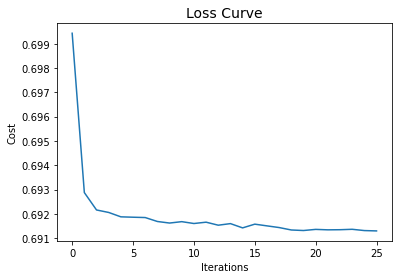

In [230]:
plt.plot(best_MLP_model_loaded.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Coding Reference for loss curve:

https://michael-fuchs-python.netlify.app/2021/02/03/nn-multi-layer-perceptron-classifier-mlpclassifier/ 

Obtain **false positive rate**, **true positive rate** and thresholds for best SVM model.

In [231]:
MLP_fpr, MLP_tpr, MLP_thresholds = roc_curve(y_test_loaded, y_predict_MLP)

Calculate AUR for best MLP model over test data.

In [232]:
AUC_MLP = auc(MLP_fpr, MLP_tpr)

AUC_MLP

0.517311625870827

Plot ROC curve for best MLP model over test data.

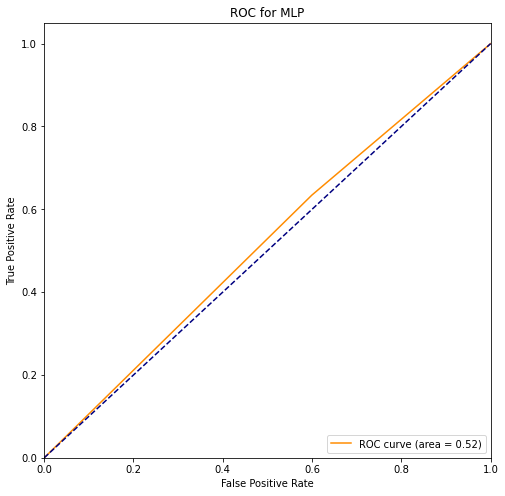

In [233]:
plt.figure(figsize=(8,8))
plt.plot(MLP_fpr, MLP_tpr, color="darkorange", label="ROC curve (area = %0.2f)" % AUC_MLP)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for MLP")
plt.legend(loc="lower right")
plt.show()

Plot confusion matrix for best MLP model over test data.

C:\Users\jraja\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


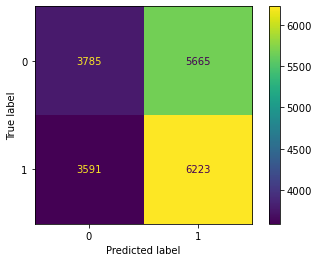

In [234]:
plot_confusion_matrix(best_MLP_model_loaded, X_test_loaded, y_test_loaded)
plt.show()

Produce Classification report for best MLP model over test data.

In [235]:
print("Classification Report for MLP")

print(classification_report(y_test_loaded, y_predict_MLP))

Classification Report for MLP
              precision    recall  f1-score   support

           0       0.51      0.40      0.45      9450
           1       0.52      0.63      0.57      9814

    accuracy                           0.52     19264
   macro avg       0.52      0.52      0.51     19264
weighted avg       0.52      0.52      0.51     19264



In [237]:
pip freeze

alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
altair==4.1.0
anaconda-client @ file:///C:/ci/anaconda-client_1635342752200/work
anaconda-navigator==2.1.2
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1626085644852/work
anyio @ file:///C:/ci/anyio_1620153418380/work/dist
appdirs==1.4.4
argh==0.26.2
argon2-cffi @ file:///C:/ci/argon2-cffi_1613037959010/work
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
astroid @ file:///C:/ci/astroid_1628063293445/work
astropy @ file:///C:/ci/astropy_1629829351783/work
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1620827162558/work
autopep8 @ file:///tmp/build/80754af9/autopep8_1615918855173/work
Babel @ file:///tmp/build/80754af9/babel_1620871417480/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
backports.functools-lru-cache @ file:///tmp/build/80754af9/backports.functools_l

In [244]:
import sys
print(sys.version)

3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


### ********************************************* END *******************************************************